In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataTrain = pd.read_csv('train.csv')

In [4]:
dataTrain.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [5]:
len(dataTrain)

20800

In [6]:
dataTrain.dropna(inplace=True)

In [7]:
dataTrain.reset_index(inplace=True)

In [8]:
len(dataTrain)

18285

In [9]:
import string
txt = dataTrain['title'][0]
txt = txt.split()
txt = [t for t in txt if t not in string.punctuation]
print(txt)

['House', 'Dem', 'Aide:', 'We', 'Didn’t', 'Even', 'See', 'Comey’s', 'Letter', 'Until', 'Jason', 'Chaffetz', 'Tweeted', 'It']


In [10]:
import string
import nltk
stop_words = nltk.corpus.stopwords.words('english')
corpus = []
def clean_text(data,vocab):
    for i in range(len(data)):
        txt = data['title'][i]
        txt = txt.split()
        txt = [t for t in txt if t not in (string.punctuation)]
        txt = [t for t in txt if t.isalpha()]
        txt = [t for t in txt if t not in stop_words]
        txt = [t.lower() for t in txt]
        seq = ' '.join(txt)
        split_seq = seq.split()
        vocab.update(split_seq)
        for index in range(len(split_seq)):
            corpus.append(split_seq[index])
    return corpus

In [11]:
"is".isalpha()

True

In [12]:
from collections import Counter
vocab = Counter()
clean_text(dataTrain,vocab)

['house',
 'dem',
 'we',
 'even',
 'see',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it',
 'hillary',
 'big',
 'woman',
 'campus',
 'breitbart',
 'why',
 'truth',
 'might',
 'get',
 'you',
 'fired',
 'civilians',
 'killed',
 'in',
 'single',
 'us',
 'airstrike',
 'have',
 'been',
 'identified',
 'iranian',
 'woman',
 'jailed',
 'fictional',
 'unpublished',
 'story',
 'woman',
 'stoned',
 'death',
 'adultery',
 'jackie',
 'hollywood',
 'would',
 'love',
 'trump',
 'he',
 'bombed',
 'north',
 'korea',
 'lack',
 'trans',
 'bathrooms',
 'breitbart',
 'benoît',
 'hamon',
 'wins',
 'french',
 'socialist',
 'presidential',
 'nomination',
 'the',
 'new',
 'york',
 'times',
 'a',
 'plan',
 'ukraine',
 'courtesy',
 'trump',
 'associates',
 'the',
 'new',
 'york',
 'times',
 'organizing',
 'action',
 'partners',
 'disrupt',
 'agenda',
 'bbc',
 'comedy',
 'sketch',
 'housewives',
 'causes',
 'outrage',
 'russian',
 'researchers',
 'discover',
 'secret',
 'nazi',
 'military',
 'base'

In [13]:
print(vocab.most_common(100))

[('the', 8074), ('new', 7010), ('york', 6322), ('times', 6280), ('breitbart', 2396), ('trump', 2361), ('is', 1268), ('hillary', 930), ('to', 899), ('donald', 829), ('clinton', 806), ('in', 769), ('a', 765), ('with', 696), ('after', 537), ('for', 527), ('of', 487), ('will', 481), ('are', 479), ('your', 474), ('how', 465), ('from', 459), ('not', 428), ('election', 409), ('what', 408), ('that', 390), ('be', 381), ('says', 375), ('obama', 373), ('it', 367), ('on', 366), ('over', 357), ('you', 355), ('about', 355), ('his', 330), ('comment', 329), ('and', 324), ('us', 319), ('war', 319), ('this', 309), ('why', 286), ('state', 283), ('who', 282), ('have', 280), ('fbi', 268), ('has', 267), ('world', 267), ('russia', 264), ('police', 263), ('president', 262), ('more', 261), ('house', 253), ('white', 250), ('up', 250), ('no', 241), ('against', 239), ('out', 237), ('media', 237), ('news', 235), ('just', 233), ('was', 231), ('campaign', 223), ('first', 216), ('bill', 212), ('briefing', 210), ('he'

In [14]:
# Remove all words which are less than 20 
min_occurence = 20 

tokens =  [w for w,c in vocab.items() if c>=min_occurence]

In [15]:
print(len(tokens))

1243


In [16]:
print(tokens[:100])

['house', 'dem', 'we', 'even', 'see', 'letter', 'until', 'it', 'hillary', 'big', 'woman', 'campus', 'breitbart', 'why', 'truth', 'might', 'get', 'you', 'fired', 'civilians', 'killed', 'in', 'us', 'have', 'been', 'story', 'death', 'hollywood', 'would', 'love', 'trump', 'he', 'north', 'korea', 'wins', 'french', 'presidential', 'the', 'new', 'york', 'times', 'a', 'plan', 'ukraine', 'action', 'agenda', 'russian', 'secret', 'military', 'base', 'officials', 'no', 'between', 'russia', 'there', 'are', 'paid', 'government', 'on', 'social', 'and', 'major', 'find', 'home', 'wells', 'chief', 'steps', 'down', 'million', 'to', 'release', 'everyone', 'arrested', 'at', 'dakota', 'access', 'pipeline', 'fbi', 'did', 'donald', 'political', 'clinton', 'sex', 'scandal', 'set', 'crime', 'is', 'abortion', 'orders', 'rise', 'american', 'zika', 'ban', 'nuclear', 'weapons', 'islamic', 'state', 'supporters', 'west', 'following']


In [17]:
def clean_data(txt):
    txt = txt.split()
    txt = [t for t in txt if t not in (string.punctuation)]
    txt = [t for t in txt if t.isalpha()]
    txt = [t for t in txt if t not in stop_words]
    txt = [t.lower() for t in txt]
    tk = [w for w in txt if w in tokens]
    seq = ' '.join(tk)
    return seq

In [18]:
data = pd.read_csv('train.csv')

In [19]:
data.dropna(inplace=True)

In [20]:
data.reset_index(inplace=True)

In [21]:
data.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [22]:
data['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [23]:
index = 0
labels = []
docs = []
for index in range(len(data)):
    clean_txt = clean_data(data['title'][index])
    docs.append(clean_txt.split())
    labels.append(data['label'][index])

In [24]:
print(docs[0],labels[0])
print(docs[1],labels[1])
print(docs[2],labels[2])
print(docs[3],labels[3])

['house', 'dem', 'we', 'even', 'see', 'letter', 'until', 'it'] 1
['hillary', 'big', 'woman', 'campus', 'breitbart'] 0
['why', 'truth', 'might', 'get', 'you', 'fired'] 1
['civilians', 'killed', 'in', 'us', 'have', 'been'] 1


In [25]:
docs = np.array(docs)
print(docs[0])
print(docs[1])

['house', 'dem', 'we', 'even', 'see', 'letter', 'until', 'it']
['hillary', 'big', 'woman', 'campus', 'breitbart']


<ipython-input-25-2a8253b5f392>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  docs = np.array(docs)


In [26]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer as tk

def create_tokenizer(lines):
    tokenizer = tk()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [27]:
# Create the tokenizer
tokenizer = create_tokenizer(docs) 
Xtrain = tokenizer.texts_to_matrix(docs,mode='freq')

In [28]:
print(Xtrain.shape)

(18285, 1244)


In [29]:
Ytrain = labels

In [30]:
Xtrain,Ytrain = np.array(Xtrain),np.array(Ytrain)

In [31]:
print(Ytrain.shape)

(18285,)


In [32]:
print(len(Xtrain[0]))
print(len(Xtrain[1]))

1244
1244


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Xtrain,Ytrain,test_size=0.25,stratify=Ytrain)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(13713, 1244)
(4572, 1244)
(13713,)
(4572,)


In [41]:
print(Ytrain[:10])

[1 0 1 1 1 0 0 0 0 0]


In [42]:
len_0 = 0
len_1 = 0
for i in range(len(Y_train)):
    if Y_train[i] == 0:
        len_0 += 1
    else:
        len_1 +=1

In [43]:
print(len_0,len_1)

7770 5943


In [44]:
len_0 = 0
len_1 = 0
for i in range(len(Y_test)):
    if Y_test[i] == 0:
        len_0 += 1
    else:
        len_1 +=1

In [45]:
print(len_0,len_1)

2591 1981


In [46]:
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,Flatten,Dropout

In [47]:
len(vocab)

17649

In [222]:
# Sentimental Analysis model 

# Our MLP model will have an input layer that equals the number of words in the vocabulary

n_words = Xtrain.shape[1]

def build_model(n_words):
    model = Sequential()
   
    model.add(Dense(50,input_shape=(n_words,),activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(100,activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(150,activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(200,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
  #  plot_model(model,to_file='model.png',show_shapes=True)
    return model

In [223]:
# Fit the network
model = build_model(n_words)
model.fit(X_train,Y_train,epochs=15,verbose=2)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 50)                62250     
_________________________________________________________________
dropout_27 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_28 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 150)               15150     
_________________________________________________________________
dropout_29 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 200)             

In [224]:
model.evaluate(X_test,Y_test)

143/143 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.9261


[0.4453299343585968, 0.9260717630386353]

In [225]:
y_pred = model.predict(X_test) > 0.5

In [226]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[2388  203]
 [ 135 1846]]


<AxesSubplot:>

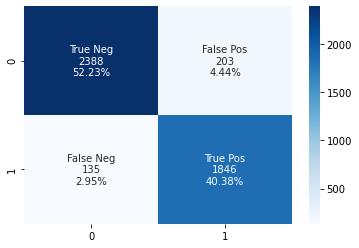

In [335]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [48]:
X,y = docs,Ytrain

In [49]:
print(X.shape)
print(y.shape)

(18285,)
(18285,)


In [50]:
def create_tokenizer(X,y,mode):
    tk = Tokenizer()
    tk.fit_on_texts(X)
    X = tk.texts_to_matrix(X,mode=mode)
    y = tk.texts_to_matrix(y,mode=mode)
    return X,y

In [51]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25)

In [246]:
def evaluate_model(Xtrain,ytrain,Xtest,ytest):
    scores = list()
    for i in range(10):
        model = build_model(n_words)
        model.fit(Xtrain,ytrain,epochs=15,verbose=2)
        loss, acc = model.evaluate(Xtest,ytest)
        scores.append(acc)
    return scores
        

In [247]:
import pandas as pd
modes = ['binary','count','tfidf','freq']
results = pd.DataFrame()

for mode in modes:
    X_train,X_test = create_tokenizer(Xtrain,Xtest,mode)

    results[mode] = evaluate_model(X_train,ytrain,X_test,ytest)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 50)                62250     
_________________________________________________________________
dropout_71 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 100)               5100      
_________________________________________________________________
dropout_72 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 150)               15150     
_________________________________________________________________
dropout_73 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 200)             

Epoch 1/15
429/429 - 2s - loss: 0.2549 - accuracy: 0.8819
Epoch 2/15
429/429 - 1s - loss: 0.1490 - accuracy: 0.9428
Epoch 3/15
429/429 - 1s - loss: 0.1081 - accuracy: 0.9610
Epoch 4/15
429/429 - 1s - loss: 0.0787 - accuracy: 0.9714
Epoch 5/15
429/429 - 1s - loss: 0.0512 - accuracy: 0.9825
Epoch 6/15
429/429 - 1s - loss: 0.0411 - accuracy: 0.9856
Epoch 7/15
429/429 - 1s - loss: 0.0324 - accuracy: 0.9888
Epoch 8/15
429/429 - 1s - loss: 0.0223 - accuracy: 0.9925
Epoch 9/15
429/429 - 1s - loss: 0.0216 - accuracy: 0.9930
Epoch 10/15
429/429 - 1s - loss: 0.0176 - accuracy: 0.9942
Epoch 11/15
429/429 - 1s - loss: 0.0172 - accuracy: 0.9942
Epoch 12/15
429/429 - 1s - loss: 0.0187 - accuracy: 0.9931
Epoch 13/15
429/429 - 1s - loss: 0.0175 - accuracy: 0.9940
Epoch 14/15
429/429 - 1s - loss: 0.0153 - accuracy: 0.9947
Epoch 15/15
429/429 - 1s - loss: 0.0154 - accuracy: 0.9948
143/143 [==============================] - 0s 1ms/step - loss: 0.7385 - accuracy: 0.9173
Model: "sequential_32"
____________

Epoch 13/15
429/429 - 1s - loss: 0.0167 - accuracy: 0.9941
Epoch 14/15
429/429 - 1s - loss: 0.0140 - accuracy: 0.9952
Epoch 15/15
429/429 - 1s - loss: 0.0160 - accuracy: 0.9949
143/143 [==============================] - 1s 1ms/step - loss: 0.6990 - accuracy: 0.9147
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 50)                62250     
_________________________________________________________________
dropout_99 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_136 (Dense)            (None, 100)               5100      
_________________________________________________________________
dropout_100 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_137 (Dense)            (None, 150)           

429/429 - 2s - loss: 0.2627 - accuracy: 0.8774
Epoch 2/15
429/429 - 1s - loss: 0.1439 - accuracy: 0.9460
Epoch 3/15
429/429 - 1s - loss: 0.1088 - accuracy: 0.9614
Epoch 4/15
429/429 - 1s - loss: 0.0779 - accuracy: 0.9736
Epoch 5/15
429/429 - 1s - loss: 0.0533 - accuracy: 0.9819
Epoch 6/15
429/429 - 1s - loss: 0.0418 - accuracy: 0.9848
Epoch 7/15
429/429 - 1s - loss: 0.0288 - accuracy: 0.9896
Epoch 8/15
429/429 - 1s - loss: 0.0233 - accuracy: 0.9918
Epoch 9/15
429/429 - 1s - loss: 0.0241 - accuracy: 0.9923
Epoch 10/15
429/429 - 1s - loss: 0.0184 - accuracy: 0.9934
Epoch 11/15
429/429 - 1s - loss: 0.0206 - accuracy: 0.9937
Epoch 12/15
429/429 - 1s - loss: 0.0153 - accuracy: 0.9950
Epoch 13/15
429/429 - 1s - loss: 0.0164 - accuracy: 0.9950
Epoch 14/15
429/429 - 1s - loss: 0.0138 - accuracy: 0.9958
Epoch 15/15
429/429 - 1s - loss: 0.0181 - accuracy: 0.9944
143/143 [==============================] - 1s 1ms/step - loss: 0.7102 - accuracy: 0.9140
Model: "sequential_39"
_______________________

Epoch 13/15
429/429 - 1s - loss: 0.0181 - accuracy: 0.9938
Epoch 14/15
429/429 - 1s - loss: 0.0188 - accuracy: 0.9931
Epoch 15/15
429/429 - 1s - loss: 0.0173 - accuracy: 0.9940
143/143 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.9162
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_170 (Dense)            (None, 50)                62250     
_________________________________________________________________
dropout_127 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_171 (Dense)            (None, 100)               5100      
_________________________________________________________________
dropout_128 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_172 (Dense)            (None, 150)           

_________________________________________________________________
dense_187 (Dense)            (None, 150)               15150     
_________________________________________________________________
dropout_141 (Dropout)        (None, 150)               0         
_________________________________________________________________
dense_188 (Dense)            (None, 200)               30200     
_________________________________________________________________
dropout_142 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 201       
Total params: 112,901
Trainable params: 112,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
429/429 - 2s - loss: 0.2662 - accuracy: 0.8773
Epoch 2/15
429/429 - 1s - loss: 0.1488 - accuracy: 0.9422
Epoch 3/15
429/429 - 1s - loss: 0.1082 - accuracy: 0.9586
Epoch 4/15
429/429 - 1s - lo

429/429 - 2s - loss: 0.3265 - accuracy: 0.8485
Epoch 2/15
429/429 - 1s - loss: 0.1610 - accuracy: 0.9390
Epoch 3/15
429/429 - 1s - loss: 0.1224 - accuracy: 0.9544
Epoch 4/15
429/429 - 1s - loss: 0.0908 - accuracy: 0.9655
Epoch 5/15
429/429 - 1s - loss: 0.0693 - accuracy: 0.9737
Epoch 6/15
429/429 - 1s - loss: 0.0560 - accuracy: 0.9797
Epoch 7/15
429/429 - 1s - loss: 0.0424 - accuracy: 0.9855
Epoch 8/15
429/429 - 1s - loss: 0.0345 - accuracy: 0.9875
Epoch 9/15
429/429 - 1s - loss: 0.0299 - accuracy: 0.9900
Epoch 10/15
429/429 - 1s - loss: 0.0265 - accuracy: 0.9910
Epoch 11/15
429/429 - 1s - loss: 0.0240 - accuracy: 0.9925
Epoch 12/15
429/429 - 1s - loss: 0.0218 - accuracy: 0.9930
Epoch 13/15
429/429 - 1s - loss: 0.0196 - accuracy: 0.9934
Epoch 14/15
429/429 - 1s - loss: 0.0175 - accuracy: 0.9941
Epoch 15/15
429/429 - 1s - loss: 0.0130 - accuracy: 0.9956
143/143 [==============================] - 0s 1ms/step - loss: 1.0276 - accuracy: 0.9097
Model: "sequential_49"
_______________________

Epoch 13/15
429/429 - 1s - loss: 0.0194 - accuracy: 0.9930
Epoch 14/15
429/429 - 1s - loss: 0.0169 - accuracy: 0.9942
Epoch 15/15
429/429 - 1s - loss: 0.0176 - accuracy: 0.9937
143/143 [==============================] - 0s 1ms/step - loss: 0.7866 - accuracy: 0.9151
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 50)                62250     
_________________________________________________________________
dropout_167 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_221 (Dense)            (None, 100)               5100      
_________________________________________________________________
dropout_168 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_222 (Dense)            (None, 150)           

Epoch 1/15
429/429 - 2s - loss: 0.3286 - accuracy: 0.8417
Epoch 2/15
429/429 - 1s - loss: 0.1580 - accuracy: 0.9401
Epoch 3/15
429/429 - 1s - loss: 0.1186 - accuracy: 0.9554
Epoch 4/15
429/429 - 1s - loss: 0.0860 - accuracy: 0.9678
Epoch 5/15
429/429 - 1s - loss: 0.0678 - accuracy: 0.9756
Epoch 6/15
429/429 - 1s - loss: 0.0507 - accuracy: 0.9815
Epoch 7/15
429/429 - 1s - loss: 0.0395 - accuracy: 0.9872
Epoch 8/15
429/429 - 1s - loss: 0.0337 - accuracy: 0.9877
Epoch 9/15
429/429 - 1s - loss: 0.0304 - accuracy: 0.9899
Epoch 10/15
429/429 - 1s - loss: 0.0258 - accuracy: 0.9917
Epoch 11/15
429/429 - 1s - loss: 0.0222 - accuracy: 0.9919
Epoch 12/15
429/429 - 1s - loss: 0.0210 - accuracy: 0.9929
Epoch 13/15
429/429 - 1s - loss: 0.0184 - accuracy: 0.9939
Epoch 14/15
429/429 - 1s - loss: 0.0178 - accuracy: 0.9942
Epoch 15/15
429/429 - 1s - loss: 0.0175 - accuracy: 0.9945
143/143 [==============================] - 0s 1ms/step - loss: 0.7825 - accuracy: 0.9119
Model: "sequential_56"
____________

Epoch 13/15
429/429 - 1s - loss: 0.0215 - accuracy: 0.9930
Epoch 14/15
429/429 - 1s - loss: 0.0195 - accuracy: 0.9937
Epoch 15/15
429/429 - 1s - loss: 0.0159 - accuracy: 0.9950
143/143 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.9160
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_255 (Dense)            (None, 50)                62250     
_________________________________________________________________
dropout_195 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_256 (Dense)            (None, 100)               5100      
_________________________________________________________________
dropout_196 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_257 (Dense)            (None, 150)           

Epoch 1/15
429/429 - 2s - loss: 0.2988 - accuracy: 0.8604
Epoch 2/15
429/429 - 1s - loss: 0.1651 - accuracy: 0.9371
Epoch 3/15
429/429 - 1s - loss: 0.1345 - accuracy: 0.9514
Epoch 4/15
429/429 - 1s - loss: 0.1059 - accuracy: 0.9627
Epoch 5/15
429/429 - 1s - loss: 0.0826 - accuracy: 0.9713
Epoch 6/15
429/429 - 1s - loss: 0.0628 - accuracy: 0.9791
Epoch 7/15
429/429 - 1s - loss: 0.0524 - accuracy: 0.9807
Epoch 8/15
429/429 - 1s - loss: 0.0403 - accuracy: 0.9856
Epoch 9/15
429/429 - 1s - loss: 0.0362 - accuracy: 0.9859
Epoch 10/15
429/429 - 1s - loss: 0.0294 - accuracy: 0.9896
Epoch 11/15
429/429 - 1s - loss: 0.0285 - accuracy: 0.9906
Epoch 12/15
429/429 - 1s - loss: 0.0237 - accuracy: 0.9915
Epoch 13/15
429/429 - 1s - loss: 0.0214 - accuracy: 0.9927
Epoch 14/15
429/429 - 1s - loss: 0.0193 - accuracy: 0.9939
Epoch 15/15
429/429 - 1s - loss: 0.0201 - accuracy: 0.9939
143/143 [==============================] - 0s 1ms/step - loss: 0.7380 - accuracy: 0.9180
Model: "sequential_63"
____________

Epoch 13/15
429/429 - 1s - loss: 0.0196 - accuracy: 0.9938
Epoch 14/15
429/429 - 1s - loss: 0.0170 - accuracy: 0.9948
Epoch 15/15
429/429 - 1s - loss: 0.0172 - accuracy: 0.9941
143/143 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.9129
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_290 (Dense)            (None, 50)                62250     
_________________________________________________________________
dropout_223 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_291 (Dense)            (None, 100)               5100      
_________________________________________________________________
dropout_224 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_292 (Dense)            (None, 150)           

In [248]:
print(results)

     binary     count     tfidf      freq
0  0.915136  0.914042  0.909668  0.916010
1  0.914479  0.905293  0.914698  0.918198
2  0.905074  0.910542  0.909011  0.915792
3  0.917323  0.916229  0.915136  0.919510
4  0.910761  0.913386  0.915136  0.917979
5  0.910105  0.911855  0.916448  0.913605
6  0.914698  0.913167  0.916448  0.917323
7  0.916885  0.914479  0.911855  0.912948
8  0.913823  0.911417  0.916885  0.916448
9  0.913605  0.910324  0.919073  0.916448


In [249]:
print(results.describe())

          binary      count      tfidf       freq
count  10.000000  10.000000  10.000000  10.000000
mean    0.913189   0.912073   0.914436   0.916426
std     0.003656   0.003013   0.003257   0.002014
min     0.905074   0.905293   0.909011   0.912948
25%     0.911472   0.910761   0.912566   0.915846
50%     0.914151   0.912511   0.915136   0.916448
75%     0.915026   0.913878   0.916448   0.917815
max     0.917323   0.916229   0.919073   0.919510


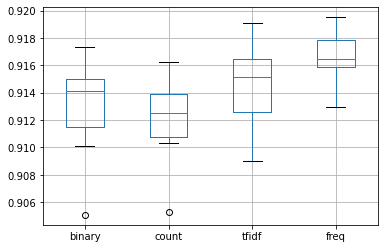

In [250]:
#box and whisker plot of the results is also presented, summarizing the accuracy distributions
#per configuration. We can see that binary achieved the best results with a modest spread and
#might be the preferred approach for this dataset


import matplotlib.pyplot as plt
results.boxplot()
plt.show()

In [52]:
tokenizer = tk()
tokenizer.fit_on_texts(docs)
X = tokenizer.texts_to_sequences(docs)
y = labels

In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
print(X[0])
print(X[1])

max_length = max([len(s) for s in X])
print(max_length)


padded_seq = pad_sequences(X,maxlen=max_length,padding='post')

print(padded_seq[0])
print(padded_seq[1])

print(y)

[52, 460, 67, 214, 218, 534, 1178, 30]
[8, 113, 164, 1031, 5]
29
[  52  460   67  214  218  534 1178   30    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
[   8  113  164 1031    5    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 

In [54]:
padded_seq,y = np.array(padded_seq),np.array(y)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(padded_seq,y,test_size=0.25,stratify=y)

In [56]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1244


In [57]:
print(X_train.shape)
print(Y_train.shape)

(13713, 29)
(13713,)


In [58]:
embeddings_index = dict()

f = open('glove.6B.200d.txt',mode='rt',encoding='utf-8')

In [59]:
import numpy as np
for line in f:
    values = line.split()
    words = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[words] = coefs
f.close()

In [60]:
print('Loaded word vectors',len(embeddings_index))

Loaded word vectors 400000


In [61]:
# create a weight matrix for words in training data
embedding_matrix = np.zeros((1244,200))

for word,i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if(embedding_vector is not None):
        embedding_matrix[i] = embedding_vector

In [62]:
model = Sequential()
model.add(Embedding(vocab_size,200,weights=[embedding_matrix],trainable=False,input_length = max_length))
model.add(Conv1D(filters=32,kernel_size=8,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 29, 200)           248800    
_________________________________________________________________
conv1d (Conv1D)              (None, 22, 32)            51232     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 352)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3530      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 303,573
Trainable params: 54,773
Non-trainable params: 248,800
___________________________________________

In [63]:
model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
429/429 [==============================] - 10s 11ms/step - loss: 0.3125 - accuracy: 0.8614
Epoch 2/20
429/429 [==============================] - 5s 11ms/step - loss: 0.1736 - accuracy: 0.9287
Epoch 3/20
429/429 [==============================] - 5s 12ms/step - loss: 0.1273 - accuracy: 0.9458
Epoch 4/20
429/429 [==============================] - 6s 14ms/step - loss: 0.0945 - accuracy: 0.9644
Epoch 5/20
429/429 [==============================] - 6s 13ms/step - loss: 0.0667 - accuracy: 0.9757
Epoch 6/20
429/429 [==============================] - 5s 11ms/step - loss: 0.0470 - accuracy: 0.9841
Epoch 7/20
429/429 [==============================] - 5s 12ms/step - loss: 0.0377 - accuracy: 0.9887
Epoch 8/20
429/429 [==============================] - 5s 11ms/step - loss: 0.0272 - accuracy: 0.9923
Epoch 9/20
429/429 [==============================] - 6s 13ms/step - loss: 0.0252 - accuracy: 0.9927
Epoch 10/20
429/429 [==============================] - 6s 13ms/step - loss: 0.0294 - accur

In [64]:
model.save('embedding+cnn_1.h5')

In [65]:
lossTrain,accTrain = model.evaluate(X_train,Y_train)
lossTest,accTest = model.evaluate(X_test,Y_test)

print(accTrain)
print(accTest)

143/143 [==============================] - 1s 4ms/step - loss: 0.5257 - accuracy: 0.9024
0.9927805662155151
0.9024496674537659
